# 1.1

Схема установки
![2.jpg](2.jpg)

In [2]:
R_0  = 0.056   #кОм
R_b  = 270     #кОм
R_i  = 5.6     #кОм
R_b  = 270     #кОм
R_z  = 0.1     #kОм
R_e  = 0.1     #кОм
C_b  = 1       #мкФ
С_em = 1000    #мкФ
U_const = 9.99 #В

![1.1.png](1.1.png)

In [3]:
E     = 0.5   #В
U_in  = 0.375 #В
U_out = 0.34  #В
K_sh  = U_out / U_in
print("K =", round(K_sh, 3))
I_in = (E - U_in) / R_i
print("Входной ток", round(I_in, 3), "мА")
tmp =  U_out / I_in
R_in_tr_sh = R_b * tmp / (R_b - tmp) 
print("R входное транзистора", round(R_in_tr_sh, 2), "кОм")

K = 0.907
Входной ток 0.022 мА
R входное транзистора 16.14 кОм


##### Правило двух нагрузок

In [4]:
U_in = 0.17 #В 
R1 = R_e
print("R1 =", R1, "кОм")
R2 = R_e * R_0 / (R_e + R_0)
print("R2 =", round(R2, 3), "кОм")
E = 0.2   #В
U_out1 = 167.4 #мВ
print("U_out1 =", U_out1, "мВ")
U_out2 = 158 #мВ
print("U_out2 =", U_out2, "мВ")
R_out = R1 * R2 * (U_out1 - U_out2) / (U_out2*R1 - U_out1 * R2)
print("R_out = ", round(R_out, 4), "кОм")
U_in = 0.375

R1 = 0.1 кОм
R2 = 0.036 кОм
U_out1 = 167.4 мВ
U_out2 = 158 мВ
R_out =  0.0034 кОм


Также нужно было убедиться в выполнении формул

$$
K^{/} = \frac{K}{1 - K\beta{}}
$$

$$
R_{вх}^/ = R_{вх}(1 - K\beta{})
$$

In [5]:
U_oc = -U_out
E = 0.5      #В
U_in = 0.435 #В
I_b = (E - U_in) / R_i
print("I_б =", round(I_b, 3), "мА")
U_out = 0.422 #В
U_in_sh = U_in - U_out
print("U_in_sh =", round(U_in_sh, 3), "В")
R_in = U_in_sh / I_b #h11e
print("R_in =", round(R_in, 3), "кОм")
K = U_out / U_in_sh
print("K =", round(K, 2))
betta = -1
K_sh = K / (1 - K * betta)
print("K_sh =", round(K_sh, 2))
R_in_sh = R_in * (1 + K)
print("R_in_sh =", round(R_in_sh, 2), "кОм")

I_б = 0.012 мА
U_in_sh = 0.013 В
R_in = 1.12 кОм
K = 32.46
K_sh = 0.97
R_in_sh = 37.48 кОм


Как видно, практическое значение $K = 0.907$, теоретическое $K = 0.97$. Данный результат в принципе можно называть подтверждением нашей теории.

С входным сопротивлением транзистора дела похуже. Практическое $R_{вхтр} = 16.14$ и теоретическое $R_{вхтр} = 37.48$

# 2.2

Схема установки
![2.2p.jpg](2.2p.jpg)

![2.2.png](2.2.png)

In [6]:
U_in = 0.067 #В
U_out = 1.36 #В
K_sh = U_out / U_in
print("K штрих", round(K_sh, 1))
I_in = 1.2   #мкА
U1 = 0.059   #В
K1 = U1 / U_in
Rb13 = 5.1   #кОм

K штрих 20.3


Находим $R_{вхтр}^{/}$ по формуле

$$
R_{вхтр}^{/} || \frac{R_{b13}}{1 - K_1} = \frac{U_{вх}}{I_{вх}}
$$

Имеем $R_{вхтр}^{/} = 176$кОм

Теперь воспользуемся правилом двух нагрузок:

In [1]:
U1 = 2.54 #В при R = inf
R2 = 560 #Ом
U2 = 1.37 #В
R_out = R2 * (U1 - U2) / U2
print("R выходное", round(R_out, 1), "Ом")
# Верхняя граничная частота, на которой коэффициент усиления
# уменьшается в корень из 2 раз по сравнению с его значением
# на средних частотах
print("F верх 400МГц ")

R выходное 478.2 Ом
F верх 400МГц 


In [8]:
betta = -51. / 1151.
print("Betta:", betta)

-0.044309296264118156


# 77 

### 2
![41.png](41.png)

A0 = 14567.307692307693


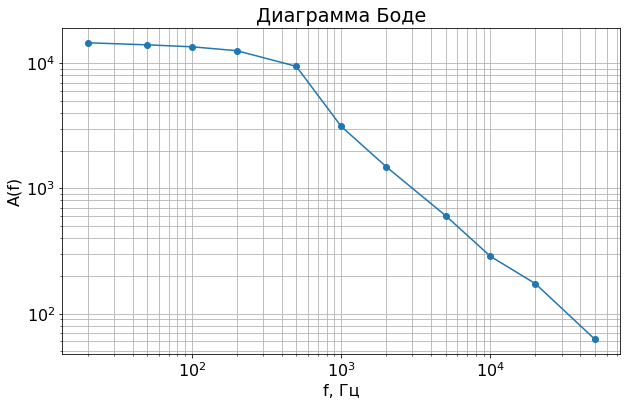

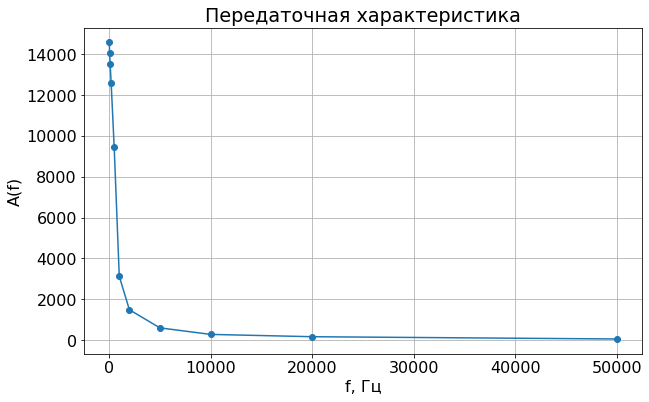

In [15]:
import numpy as np
f = np.array    ([20,    50,    100,   200,  500,  1000,  2000, 5000, 10000, 20000, 50000])
U_out = np.array([3.75,  3.75,  3.75,  3.74, 3.74, 3.5,   3.1,  2.7,  1.7,   1.2,   0.5])
U_a = np.array  ([0.026, 0.027, 0.028, 0.03, 0.04, 0.113, 0.21, 0.45, 0.6,   0.7,   0.811])
R3 = 100000. # Ом
R4 = 1000.   # Ом
A = (1. + R3 / R4) * U_out / U_a

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
plt.figure(figsize=(10,6))
plt.loglog(f, A, "-o") 
plt.title("Диаграмма Боде")
plt.xlabel("f, Гц")
plt.ylabel("A(f)")
plt.grid(b=True, which='major', axis='both')
plt.grid(b=True, which='minor', axis='both')
plt.figure(figsize=(10,6))
plt.plot(f, A, "-o")
plt.title("Передаточная характеристика")
plt.xlabel("f, Гц")
plt.ylabel("A(f)")
plt.grid(b=True, which='major', axis='both')
plt.grid(b=True, which='minor', axis='both')

print("A0 =", A[0])

# 3
![51.png](51.png)

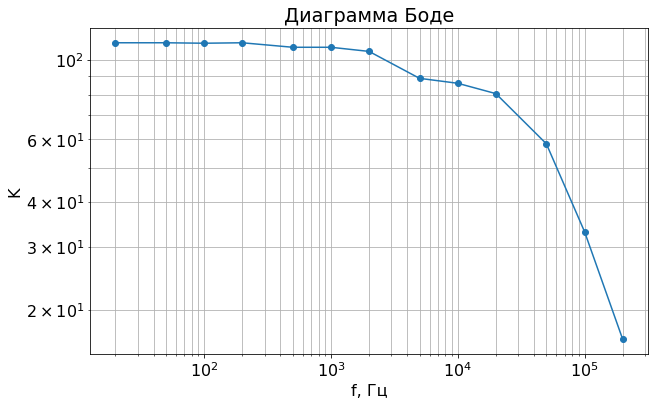

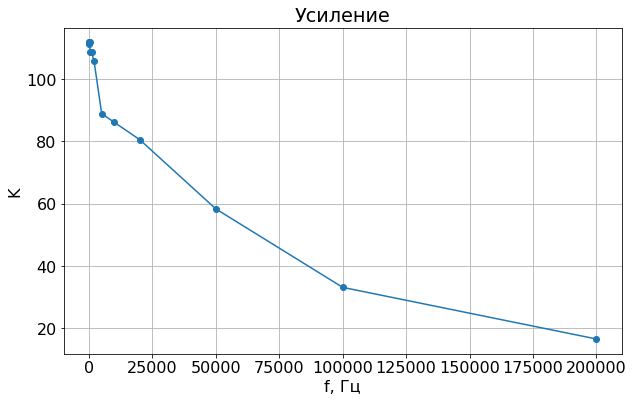

In [14]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
R1 = 1 #кОм
R2 = 100 #кОм
U_out = -10 #В
U_os = U_out / (1. + R2 / R1)
f = np.array    ([20,  50,  100, 200,  500,  1000,  2000, 5000, 10000, 20000, 50000, 100000, 200000])
U_in  = np.array([34,  34,  35,  34,   35,   35,    35,   36,   36,    36,    36,    35,     35])
U_out = np.array([3.8, 3.8, 3.9, 3.8,  3.8,  3.8,   3.7,  3.2,  3.1,   2.9,   2.1,   1.16,   0.58])
U_in = np.array(list(map(lambda x : x * 10 **(-3), U_in)))
K = U_out / U_in
plt.figure(figsize=(10, 6))
plt.loglog(f, K, "-o")
plt.title("Диаграмма Боде")
plt.xlabel("f, Гц")
plt.ylabel("K")
plt.grid(b=True, which='major', axis='both')
plt.grid(b=True, which='minor', axis='both')
plt.figure(figsize=(10, 6))
plt.plot(f, K, "-o")
plt.title("Усиление")
plt.xlabel("f, Гц")
plt.ylabel("K")
plt.grid(b=True, which='major', axis='both')
plt.grid(b=True, which='minor', axis='both')
plt.show()

![3.png](3.png)

# 7.2
![61.png](61.png)

In [13]:
U_in = 1.9
R3 = 2
R_i  = np.array([2.,   5.1,  10.])
U_a  = np.array([0.85, 2.16, 4.17])
I_n  = U_a / R_i
R_in = (U_in * R3) / (U_in - U_a)
print("I_n =", list(map(lambda x : round(x, 3), I_n)))
print("R_in =", list(map(lambda x : round(x, 2), R_in)))

I_n = [0.425, 0.424, 0.417]
R_in = [3.62, -14.62, -1.67]


### 10.3
![71.png](71.png)

![Polosa.png](Polosa.png)

##### АЧХ

![AXH.png](AXH.png)

$\Delta{}f_{0.7} = 1.03 кГц$

![10.2.jpg](10.2.jpg)